## Create Latitude and Longitude Combinations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from citipy import citipy

In [3]:
# create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

## Generate Random World Cities

In [5]:
# create list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # add to cities list
    if city not in cities:
        cities.append(city)

# print the city count
len(cities)

647

In [6]:
import requests

# import the API key
from config import weather_api_key

# import the datetime module from the datetime library
from datetime import datetime

## 6.2.6 Get the City Weather Data

In [7]:
# Create an empty list to hold the weather data
city_data = []

# url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print beginning for logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [8]:
#cities = ["Boston"]

In [ ]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    except:
        print("City not found. Skipping..")
        continue
    
    # Data load complete
    print("-------------------------------------------")
    print("Data Retrieval Complete ")
    print("-------------------------------------------")
    

Processing Record 48 of Set 13 | longyearbyen
-------------------------------------------
Data Retrieval Complete 
-------------------------------------------
Processing Record 49 of Set 13 | butaritari
-------------------------------------------
Data Retrieval Complete 
-------------------------------------------
Processing Record 50 of Set 13 | cape town
-------------------------------------------
Data Retrieval Complete 
-------------------------------------------
Processing Record 51 of Set 13 | halden
-------------------------------------------
Data Retrieval Complete 
-------------------------------------------
Processing Record 52 of Set 13 | bambous virieux
-------------------------------------------
Data Retrieval Complete 
-------------------------------------------
Processing Record 53 of Set 13 | barrow
-------------------------------------------
Data Retrieval Complete 
-------------------------------------------
Processing Record 54 of Set 13 | victoria
------------------

In [10]:
len(city_data)

590

## 6.2.7 Create a DataFrame of City Weather Data

In [11]:
# convert array of dictionaries to Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,42.64,70,75,21.85,SJ,2021-09-22 16:10:38
1,Butaritari,3.0707,172.7902,82.49,74,100,16.33,KI,2021-09-22 16:10:39
2,Cape Town,-33.9258,18.4232,70.88,54,71,3.00,ZA,2021-09-22 16:05:59
3,Halden,59.1226,11.3871,64.90,89,80,14.00,NO,2021-09-22 16:10:39
4,Bambous Virieux,-20.3428,57.7575,73.22,65,39,15.46,MU,2021-09-22 16:10:39
5,Barrow,71.2906,-156.7887,30.22,86,90,21.85,US,2021-09-22 16:10:01
6,Victoria,22.2855,114.1577,87.33,83,35,12.15,HK,2021-09-22 16:10:40
7,Bredasdorp,-34.5322,20.0403,68.29,75,58,8.90,ZA,2021-09-22 16:10:40
8,Ushuaia,-54.8000,-68.3000,56.86,51,75,5.75,AR,2021-09-22 16:07:49
9,Kieta,-6.2167,155.6333,76.91,85,97,3.78,PG,2021-09-22 16:10:40


In [12]:
# reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2021-09-22 16:10:38,78.2186,15.6401,42.64,70,75,21.85
1,Butaritari,KI,2021-09-22 16:10:39,3.0707,172.7902,82.49,74,100,16.33
2,Cape Town,ZA,2021-09-22 16:05:59,-33.9258,18.4232,70.88,54,71,3.00
3,Halden,NO,2021-09-22 16:10:39,59.1226,11.3871,64.90,89,80,14.00
4,Bambous Virieux,MU,2021-09-22 16:10:39,-20.3428,57.7575,73.22,65,39,15.46
5,Barrow,US,2021-09-22 16:10:01,71.2906,-156.7887,30.22,86,90,21.85
6,Victoria,HK,2021-09-22 16:10:40,22.2855,114.1577,87.33,83,35,12.15
7,Bredasdorp,ZA,2021-09-22 16:10:40,-34.5322,20.0403,68.29,75,58,8.90
8,Ushuaia,AR,2021-09-22 16:07:49,-54.8000,-68.3000,56.86,51,75,5.75
9,Kieta,PG,2021-09-22 16:10:40,-6.2167,155.6333,76.91,85,97,3.78


In [14]:
# Write out to CSV file
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs Temperature

In [15]:
# Extract relevant fields from DataFrame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
import time

In [26]:
def latitude_scatter_plot(title, ylabel, y_series, fig_name):
    """
    Description: 
        Render scatter plot based on title, y axis label and y series passed in
    
    args:
        title: title of scatter plot
        ylabel: label of y-axis
        y_series: Series representing the y-axis
        fig_name: path and file name of figure to save with png extension
    """
    # Build the scatter plot for latitude vs. max temperature
    plt.scatter(lats,
               y_series,
               edgecolor="black", linewidths=1, marker="o",
               alpha=0.8, label="Cities")

    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.grid(True)

    # save the figure
    plt.savefig(fig_name)

    # Show plot
    plt.show()

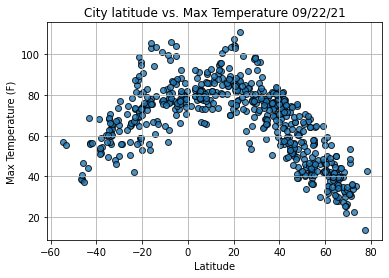

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")
          
# Show plot
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

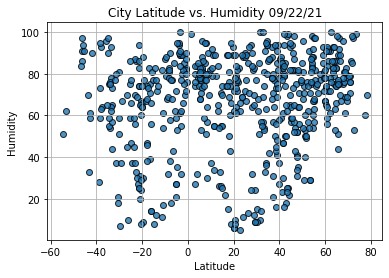

In [25]:
latitude_scatter_plot("City Latitude vs. Humidity " + time.strftime("%x"), "Humidity", humidity, "weather_data/Fig2.png")

## 6.3.3 Plot Latitude vs Cloudiness

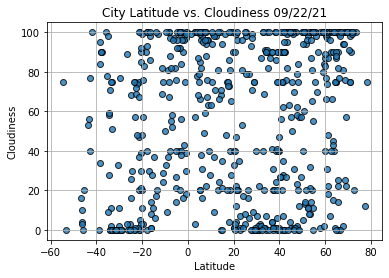

In [27]:
latitude_scatter_plot("City Latitude vs. Cloudiness " + time.strftime("%x"), "Cloudiness", cloudiness, "weather_data/Fig3.png")

## 6.5.4 Plot Latitude vs Wind Speed

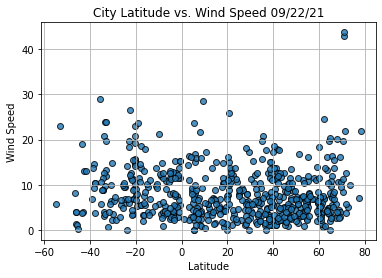

In [28]:
latitude_scatter_plot("City Latitude vs. Wind Speed " + time.strftime("%x"), "Wind Speed", wind_speed, "weather_data/Fig4.png")